# Survivor Data Analysis (Exploratory Data Analysis - EDA)

In this notebook, we’ll explore data from the TV show *Survivor* to understand what traits might influence success. We’ve pulled contestant and season information, and we’re starting by merging them into a single master dataset for analysis.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
contestants = pd.read_csv("../data/contestant_table.csv")
seasons = pd.read_csv("../data/season_table.csv")

# Preview the first few rows of each
#print("Contestants:")
#display(contestants.head())

#print("Seasons:")
#display(seasons.head())

## Step 1: Load and Merge Data

We begin by loading our CSVs and merging them into one master dataset. This gives us a single table with contestant info, season details, and more — ready for analysis.

In [146]:
master = pd.merge(contestants, seasons, on="num_season", how="left")

In [147]:
display(master.head(5))

,contestant_name,age,hometown,profession,num_season,finish,gender,african_american_x,asian_american_x,latin_american_x,...,african_american_y,asian_american_y,latin_american_y,poc_y,lgbt_y,jewish_y,muslim_y,num_quits,num_evacs,winner
0,Sonja Christopher,63,"Walnut Creek, CA",Musician/Retired Teacher,1,16,F,0,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
1,B.B. Andersen,64,"Mission Hills, KS",Real Estate Developer,1,15,M,0,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
2,Stacey Stillman,27,"San Francisco, CA",Attorney,1,14,F,0,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
3,Ramona Gray,29,"Edison, NJ",Biochemist,1,13,F,1,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
4,Dirk Been,23,"Spring Green, WI",Dairy Farmer,1,12,M,0,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch


## Step 2: What Makes a Survivor Winner?

Let’s filter the dataset to look only at winners and start analyzing what makes them stand out — by age, gender, profession, and location.


**Average Age of Winners**

Average Age of Winners: 31.63


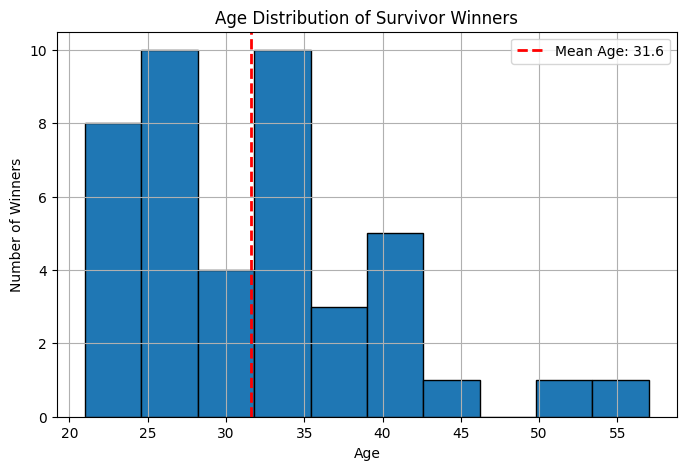

In [148]:
# winning contestants from each season
winners = master[master['contestant_name'] == master['winner']]

# Define the average
avg_winner_age = winners['age'].mean()
print(f"Average Age of Winners: {avg_age:.2f}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(winners['age'], bins=10, edgecolor='black')
plt.axvline(avg_winner_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {avg_winner_age:.1f}')
plt.title('Age Distribution of Survivor Winners')
plt.xlabel('Age')
plt.ylabel('Number of Winners')
plt.legend()
plt.grid(True)
plt.show()

**Male vs Female Winners**

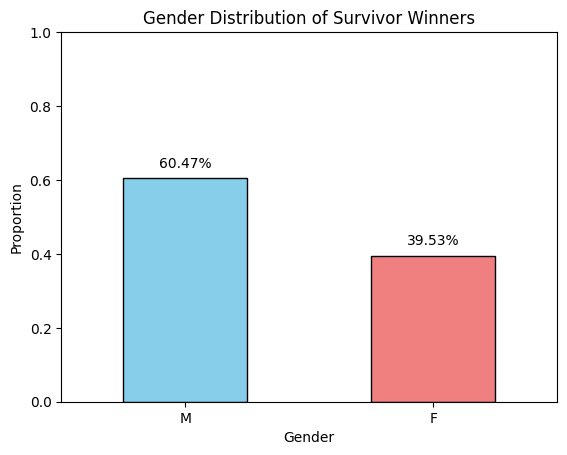

In [149]:
# Get proportions
gender_counts = winners['gender'].value_counts(normalize=True)

# Plot
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

# Formatting
plt.title('Gender Distribution of Survivor Winners')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Show the percentage values on top of bars
for i, value in enumerate(gender_counts):
    plt.text(i, value + 0.02, f"{value:.2%}", ha='center', va='bottom')

plt.show()

**Top Winners Profession**

In [150]:
winners['profession'].value_counts().head(10)

profession
Police Officer                 3
Firefighter                    2
Office Assistant               2
Professional Soccer Player     1
Office Manager                 1
Personal Nurse                 1
Corporate Trainer              1
Swimsuit Model                 1
Used Car Salesman              1
Highway Construction Worker    1
Name: count, dtype: int64

**Winners From States**

In [151]:
winners['state'].value_counts().head(10)

state
California      8
New York        4
New Jersey      4
Pennsylvania    3
Texas           2
Utah            2
Iowa            2
Idaho           2
Ontario         2
Rhode Island    1
Name: count, dtype: int64

## Step 3: Who Gets Cast?

Now that we’ve looked at who wins Survivor, let’s take a step back and ask: who even gets the chance to play?

In this section, we’ll explore all contestants to identify patterns in CBS’s casting choices — regardless of performance. We’ll look at age, gender, profession, and location to better understand who tends to be selected for the show.


**Average Age of Contestants**

Average Age of All Contestants: 33.41


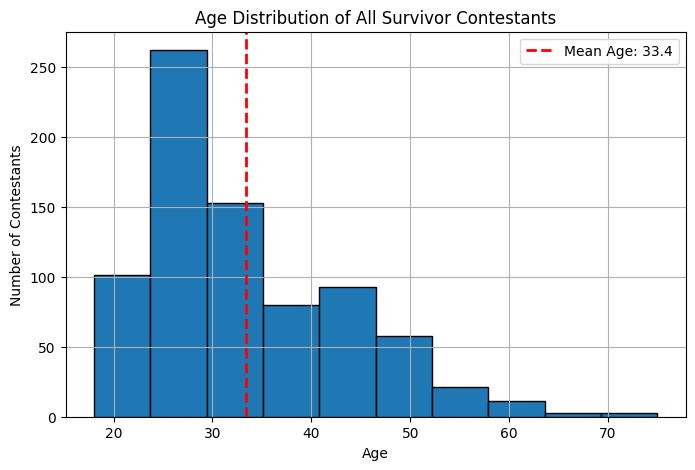

In [152]:
# Define the average
avg_cast_age = master['age'].mean()
print(f"Average Age of All Contestants: {avg_cast_age:.2f}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(master['age'].dropna(), bins=10, edgecolor='black')
plt.axvline(avg_cast_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {avg_cast_age:.1f}')
plt.title('Age Distribution of All Survivor Contestants')
plt.xlabel('Age')
plt.ylabel('Number of Contestants')
plt.legend()
plt.grid(True)
plt.show()

**Gender of All Contestants**

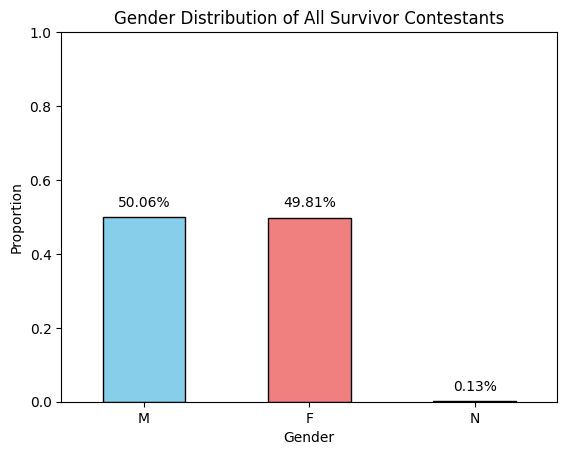

In [153]:
# Get proportions
gender_counts_all = master['gender'].value_counts(normalize=True)

# Plot
gender_counts_all.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

# Formatting
plt.title('Gender Distribution of All Survivor Contestants')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Show the percentage values on top of bars
for i, value in enumerate(gender_counts_all):
    plt.text(i, value + 0.02, f"{value:.2%}", ha='center', va='bottom')

plt.show()


**All Contestants Profession**

In [154]:
# Top 10 professions among all contestants
master['profession'].value_counts().head(10)

profession
Attorney             20
Student              20
Bartender            17
Firefighter          13
Law Student          11
Police Officer       10
Teacher               8
Real Estate Agent     7
Waitress              6
Model                 6
Name: count, dtype: int64

**All Contestants From States**

In [155]:
# Top 10 states among all contestants
master['state'].value_counts().head(10)

state
California        200
New York           72
Florida            50
Texas              46
Massachusetts      27
Pennsylvania       23
New Jersey         23
North Carolina     22
Illinois           21
Tennessee          18
Name: count, dtype: int64

## Step 4: Do Returning Players Perform Better?

Some contestants are invited back to play Survivor multiple times. In this section, we’ll examine whether returning players tend to perform better on average than first-time contestants.

In [156]:
# Group by number of appearances and calculate average finish and count of contestants
appearance_stats = master.groupby('num_appearance').agg(
    Average_Finish=('finish', 'mean'),
    Num_Contestants=('contestant_name', 'count')
).reset_index()

# Rename for clarity
appearance_stats.columns = ['Number of Appearances', 'Average Finish', 'Number of Contestants']
display(appearance_stats)

,Number of Appearances,Average Finish,Number of Contestants
0,1.0,9.630435,644
1,2.0,9.514563,103
2,3.0,10.700000,30
3,4.0,11.571429,7
4,5.0,17.000000,1


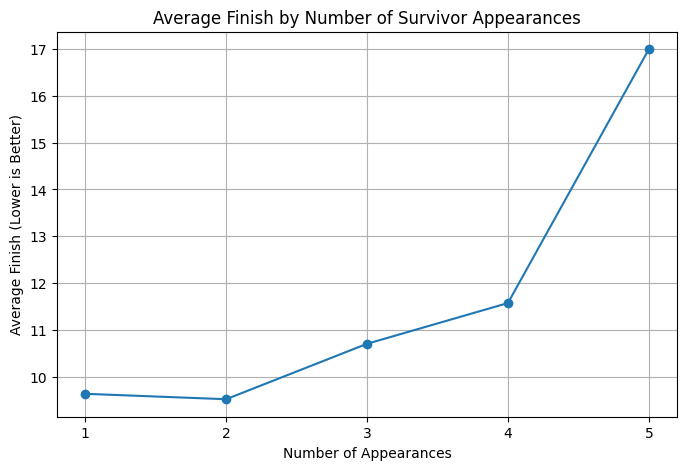

In [157]:
plt.figure(figsize=(8, 5))
plt.plot(appearance_stats['Number of Appearances'], appearance_stats['Average Finish'], marker='o')
plt.title('Average Finish by Number of Survivor Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Average Finish (Lower is Better)')
plt.grid(True)
plt.xticks(appearance_stats['Number of Appearances'])
plt.show()


In [158]:
# players who appeared the most
most_returning = master['contestant_name'].value_counts().head(10)
print(most_returning)

contestant_name
Rob Mariano           5
Rupert Boneham        4
Ozzy Lusth            4
Cirie Fields          4
Sandra Diaz-Twine     4
Parvati Shallow       4
Tyson Apostol         4
Jerri Manthey         3
Amber Mariano         3
Stephenie LaGrossa    3
Name: count, dtype: int64


## Step 5: Fun Facts and Hidden Insights 

To wrap up the project, let’s explore some quick and fun trivia based on the Survivor dataset — the kind of insights that might surprise fans or make your project more engaging.

In [159]:
# Get the oldest contestant based on max age
oldest = master.loc[master['age'] == master['age'].max(), ['contestant_name', 'age', 'season']]
print("Oldest Contestant:")
display(oldest)

Oldest Contestant:


,contestant_name,age,season
113,Rudy Boesch,75,Survivor: All-Stars


In [160]:
# Get the youngest contestant based on min age
youngest = master.loc[master['age'] == master['age'].min(), ['contestant_name', 'age', 'season']]
print("Youngest Contestant:")
display(youngest)

Youngest Contestant:


,contestant_name,age,season
587,Will Wahl,18,Survivor: Millennials vs. Gen X
644,Michael Yerger,18,Survivor: Ghost Island


In [161]:
# Find the contestant who appeared the most times
most_appearances = master['contestant_name'].value_counts().head(1)
print("Contestant with the Most Appearances:")
print(most_appearances)

Contestant with the Most Appearances:
contestant_name
Rob Mariano    5
Name: count, dtype: int64


In [162]:
# Find contestants who have won Survivor more than once
# For each contestant, count how many times their name appears as the winner
multi_win = master.groupby('contestant_name')['winner'].apply(lambda x: (x == x.name).sum())

# Filter to show only contestants who have more than 1 win
multi_win = multi_win[multi_win > 1]

print("Contestants Who Won More Than Once:")
display(multi_win)

Contestants Who Won More Than Once:


contestant_name
Sandra Diaz-Twine    2
Tony Vlachos         2
Name: winner, dtype: int64

In [163]:
# Top winners from state
winners = master[master['contestant_name'] == master['winner']]
top_winner_state = winners['state'].value_counts().head(1)
print("State with the Most Winners:")
print(top_winner_state)

State with the Most Winners:
state
California    8
Name: count, dtype: int64


In [164]:
# Filter for returning players (more than one appearance)
# Then group by season and count how many unique returnees played in each
returnees_per_season = master[master['num_appearance'] > 1].groupby('season')['contestant_name'].nunique()

# Sort to find the season with the most returnees
returnees_per_season = returnees_per_season.sort_values(ascending=False)

print("Season with the Most Returning Players:")
display(returnees_per_season.head(1))

Season with the Most Returning Players:


season
Survivor: Cambodia    20
Name: contestant_name, dtype: int64

## Key Takeaways

- Winners tend to be slightly older than the average contestant.
- CBS tends to cast men and women equally.
- Returning players do not always perform better — but fan favorites get more chances.
- California has produced the most players/winners.
- A couple contestants have won the game more than once.

This analysis offers a deeper look into who gets cast on Survivor and who succeeds.
